<a href="https://colab.research.google.com/github/saranyapalani/sample/blob/master/wow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#PREDICTING JEWELS THEFT AND MURDER CRIME RATE USING FACEBOOK PROPHET

In [0]:
#importing datasets from google drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#load the packages

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df_1 = pd.read_csv('/content/drive/My Drive/d1.csv', error_bad_lines=False)
df_2 = pd.read_csv('/content/drive/My Drive/d2.csv', error_bad_lines=False)
df_3 = pd.read_csv('/content/drive/My Drive/d3.csv', error_bad_lines=False)
df_4 = pd.read_csv('/content/drive/My Drive/d4.csv', error_bad_lines=False)
df_5 = pd.read_csv('/content/drive/My Drive/d5.csv', error_bad_lines=False)
df_6 = pd.read_csv('/content/drive/My Drive/d6.csv', error_bad_lines=False)



In [0]:
#Concat all the dataset into one

In [8]:
data = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6], ignore_index=False, axis=0)
data.head()

,ID,Case Number,Date,Primary Type,Location Description,Arrest,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Location
0,11149297,JA506752,01-01-2014 00:01,CRIMINAL SEXUAL ASSAULT,RESIDENCE,False,25.0,26.0,23.0,NaN,NaN,2014,NaN,NaN,NaN
1,10394673,HX561124,07-05-2014 00:00,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,25.0,31.0,22.0,NaN,NaN,2014,NaN,NaN,NaN
2,12032628,JD211529,09-01-2014 14:25,DECEPTIVE PRACTICE,RESIDENCE,False,7.0,16.0,67.0,NaN,NaN,2014,NaN,NaN,NaN
3,11895409,JC515153,11/14/2014 08:00:00 AM,CRIMINAL SEXUAL ASSAULT,RESIDENCE,False,16.0,31.0,15.0,NaN,NaN,2014,NaN,NaN,NaN
4,9863337,HX513133,11/19/2014 09:20:00 PM,BATTERY,ALLEY,False,24.0,50.0,2.0,1156959.0,1945011.0,2014,42.004885,-87.697889,"(42.004884982, -87.697889126)"


In [0]:
#dropping unwanted columns

In [0]:
data.drop(['Case Number','X Coordinate', 'Y Coordinate','Year','Ward','Community Area', 'Location', 
                 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)


In [11]:
data.head()


,ID,Date,Primary Type,Location Description,Arrest
0,11149297,01-01-2014 00:01,CRIMINAL SEXUAL ASSAULT,RESIDENCE,False
1,10394673,07-05-2014 00:00,OFFENSE INVOLVING CHILDREN,RESIDENCE,False
2,12032628,09-01-2014 14:25,DECEPTIVE PRACTICE,RESIDENCE,False
3,11895409,11/14/2014 08:00:00 AM,CRIMINAL SEXUAL ASSAULT,RESIDENCE,False
4,9863337,11/19/2014 09:20:00 PM,BATTERY,ALLEY,False


In [0]:
#Assembling a datetime by rearranging the dataframe column "Date"

In [13]:
data['Date'] = pd.to_datetime(data['Date'].astype(str), errors='coerce')
data['Date'] = pd.to_datetime(data['Date'], format = '%d/%m/%Y %H:%M:%S')
data.head()


,ID,Date,Primary Type,Location Description,Arrest
0,11149297,2014-01-01 00:01:00,CRIMINAL SEXUAL ASSAULT,RESIDENCE,False
1,10394673,2014-07-05 00:00:00,OFFENSE INVOLVING CHILDREN,RESIDENCE,False
2,12032628,2014-09-01 14:25:00,DECEPTIVE PRACTICE,RESIDENCE,False
3,11895409,2014-11-14 08:00:00,CRIMINAL SEXUAL ASSAULT,RESIDENCE,False
4,9863337,2014-11-19 21:20:00,BATTERY,ALLEY,False


In [0]:
#setting the index to be the date

In [15]:
data.index = pd.DatetimeIndex(data.Date)
data.head()


,ID,Date,Primary Type,Location Description,Arrest
Date,,,,,
2014-01-01 00:01:00,11149297,2014-01-01 00:01:00,CRIMINAL SEXUAL ASSAULT,RESIDENCE,False
2014-07-05 00:00:00,10394673,2014-07-05 00:00:00,OFFENSE INVOLVING CHILDREN,RESIDENCE,False
2014-09-01 14:25:00,12032628,2014-09-01 14:25:00,DECEPTIVE PRACTICE,RESIDENCE,False
2014-11-14 08:00:00,11895409,2014-11-14 08:00:00,CRIMINAL SEXUAL ASSAULT,RESIDENCE,False
2014-11-19 21:20:00,9863337,2014-11-19 21:20:00,BATTERY,ALLEY,False


In [0]:
#Crime type and their counts

In [17]:
data['Primary Type'].value_counts()


JEWEL THEFT MURDER                   372506
BATTERY                              297180
CRIMINAL DAMAGE                      171022
ASSAULT                              113000
DECEPTIVE PRACTICE                   108170
NARCOTICS                            105747
OTHER OFFENSE                        103010
BURGLARY                              76406
ROBBERY                               60943
MOTOR VEHICLE THEFT                   50325
CRIMINAL TRESPASS                     40785
WEAPONS VIOLATION                     26395
OFFENSE INVOLVING CHILDREN            13977
PUBLIC PEACE VIOLATION                11321
MOTOR VEHICLE JEWEL THEFT MURDER      11293
CRIM SEXUAL ASSAULT                    8969
INTERFERENCE WITH PUBLIC OFFICER       7582
SEX OFFENSE                            6465
PROSTITUTION                           5881
HOMICIDE                               3492
ARSON                                  2561
LIQUOR LAW VIOLATION                   1605
GAMBLING                        

In [0]:
#taking top 15 crime types and their counts

In [19]:
data['Primary Type'].value_counts().iloc[:15]

JEWEL THEFT MURDER                  372506
BATTERY                             297180
CRIMINAL DAMAGE                     171022
ASSAULT                             113000
DECEPTIVE PRACTICE                  108170
NARCOTICS                           105747
OTHER OFFENSE                       103010
BURGLARY                             76406
ROBBERY                              60943
MOTOR VEHICLE THEFT                  50325
CRIMINAL TRESPASS                    40785
WEAPONS VIOLATION                    26395
OFFENSE INVOLVING CHILDREN           13977
PUBLIC PEACE VIOLATION               11321
MOTOR VEHICLE JEWEL THEFT MURDER     11293
Name: Primary Type, dtype: int64

In [0]:
#indexing the top 15 crimes

In [21]:
data['Primary Type'].value_counts().iloc[:15].index

Index(['JEWEL THEFT MURDER', 'BATTERY', 'CRIMINAL DAMAGE', 'ASSAULT',
       'DECEPTIVE PRACTICE', 'NARCOTICS', 'OTHER OFFENSE', 'BURGLARY',
       'ROBBERY', 'MOTOR VEHICLE THEFT', 'CRIMINAL TRESPASS',
       'WEAPONS VIOLATION', 'OFFENSE INVOLVING CHILDREN',
       'PUBLIC PEACE VIOLATION', 'MOTOR VEHICLE JEWEL THEFT MURDER'],
      dtype='object')

In [0]:
#plotting the crime types

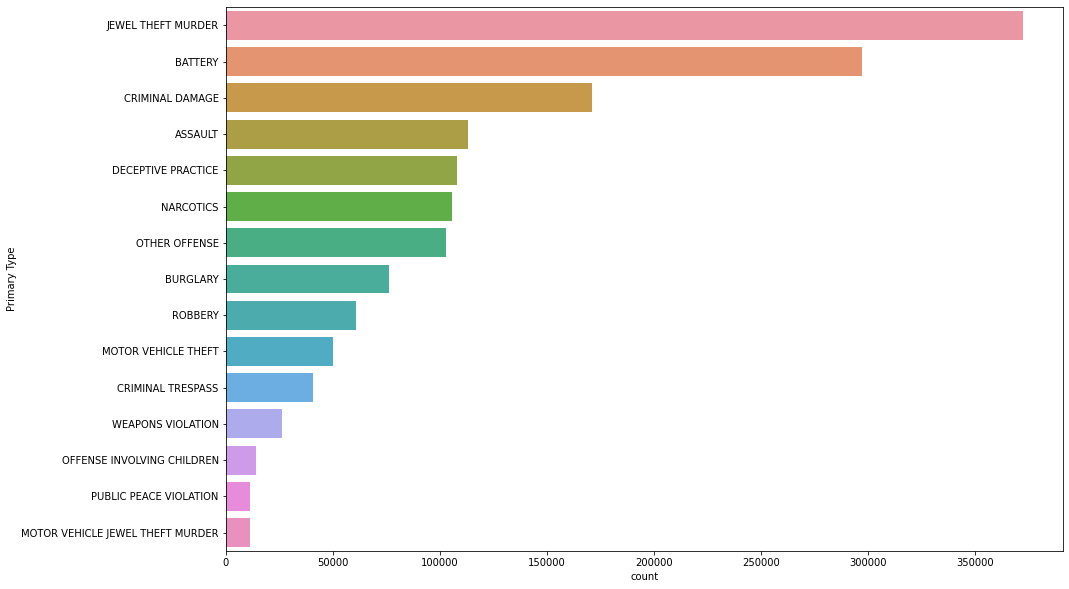

In [24]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = data, 
              order = data['Primary Type'].value_counts().iloc[:15].index)


In [0]:
Groups = data.groupby(data['Primary Type'])
Groups = dict(list(Groups))
theft_data = [Groups['JEWEL THEFT MURDER']]
theft_data = pd.concat(theft_data, axis = 0)
del Groups
del data

In [26]:
theft_data.resample('Y').size()

Date
2014-12-31    61565
2015-12-31    57342
2016-12-31    61615
2017-12-31    64368
2018-12-31    65253
2019-12-31    62363
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Jewels theft and murder Crimes')

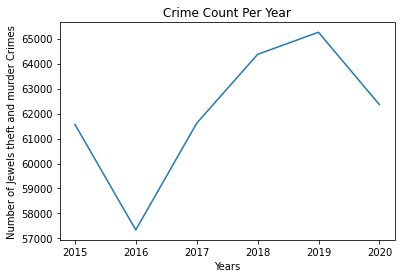

In [27]:
plt.plot(theft_data.resample('Y').size())
plt.title('Crime Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Jewels theft and murder Crimes')


In [28]:
theft_prophet = theft_data.resample('M').size().reset_index()
theft_prophet.columns = ['Date', 'Crime Count']
theft_prophet.head()


,Date,Crime Count
0,2014-01-31,4448
1,2014-02-28,4017
2,2014-03-31,4515
3,2014-04-30,4836
4,2014-05-31,5352


In [29]:
theft_prophet_df = pd.DataFrame(theft_prophet)
theft_prophet_df.columns


Index(['Date', 'Crime Count'], dtype='object')

In [30]:
theft_prophet_data = theft_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})
theft_prophet_data.head()


,ds,y
0,2014-01-31,4448
1,2014-02-28,4017
2,2014-03-31,4515
3,2014-04-30,4836
4,2014-05-31,5352


In [31]:
from fbprophet import Prophet
m = Prophet()
m.add_seasonality(name="weekly",period=7,fourier_order=5)


In [32]:
theft_prophet_data.shape

(72, 2)

In [0]:
train = theft_prophet_data[:62]
test = theft_prophet_data[62:]

In [34]:
train

,ds,y
0,2014-01-31,4448
1,2014-02-28,4017
2,2014-03-31,4515
3,2014-04-30,4836
4,2014-05-31,5352
...,...,...
57,2018-10-31,5665
58,2018-11-30,5156
59,2018-12-31,5688
60,2019-01-31,4554


In [35]:
m.fit(train)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
future = m.make_future_dataframe(periods=730)
future

,ds
0,2014-01-31
1,2014-02-28
2,2014-03-31
3,2014-04-30
4,2014-05-31
...,...
787,2021-02-23
788,2021-02-24
789,2021-02-25
790,2021-02-26


In [0]:
forecast = m.predict(future)


In [38]:
forecast[['ds','trend','yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,trend,yhat,yhat_lower,yhat_upper
787,2021-02-23,5895.572231,2653.955280,2386.341076,2922.844840
788,2021-02-24,5895.968250,2884.607356,2597.219021,3154.584039
789,2021-02-25,5896.364270,3462.711465,3197.804720,3730.220779
790,2021-02-26,5896.760290,3810.758715,3540.596563,4074.600675
791,2021-02-27,5897.156310,4193.234146,3919.679660,4459.678534


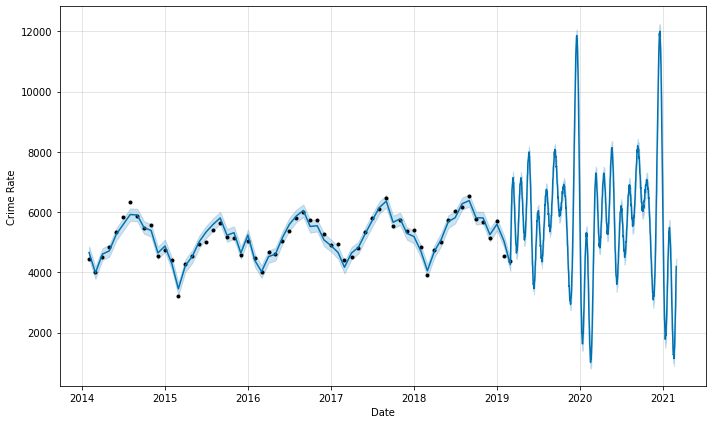

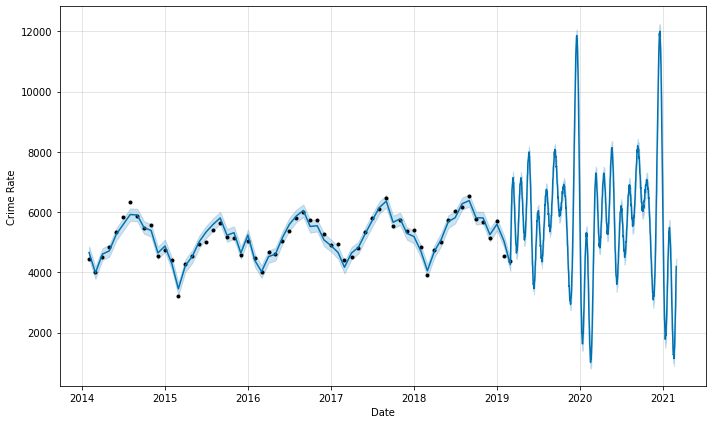

In [39]:
m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

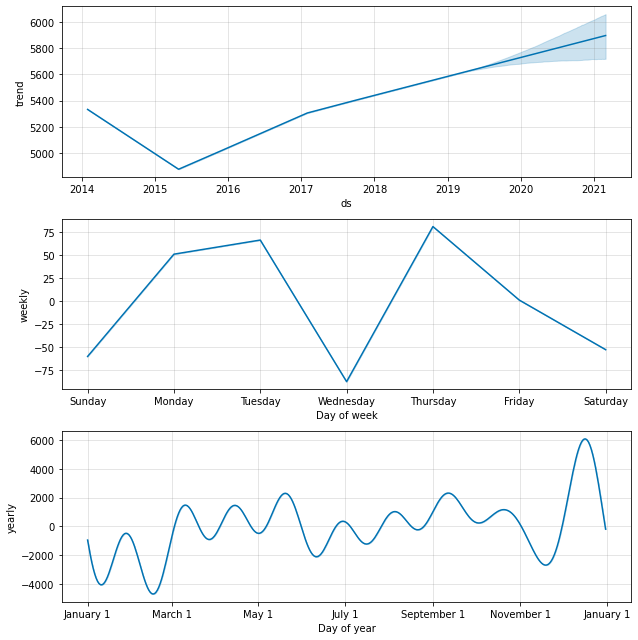

In [40]:
fig=m.plot_components(forecast)

In [41]:
test

,ds,y
62,2019-03-31,4475
63,2019-04-30,4649
64,2019-05-31,5386
65,2019-06-30,5647
66,2019-07-31,5991
67,2019-08-31,6159
68,2019-09-30,5436
69,2019-10-31,5381
70,2019-11-30,4864
71,2019-12-31,5437


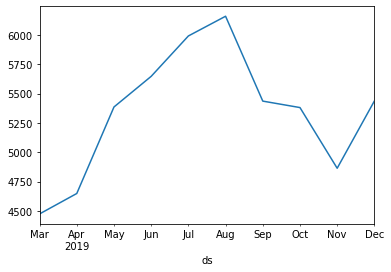

In [42]:
test = test.set_index("ds")
test = test['y']
import matplotlib.pyplot as plt
test.plot()


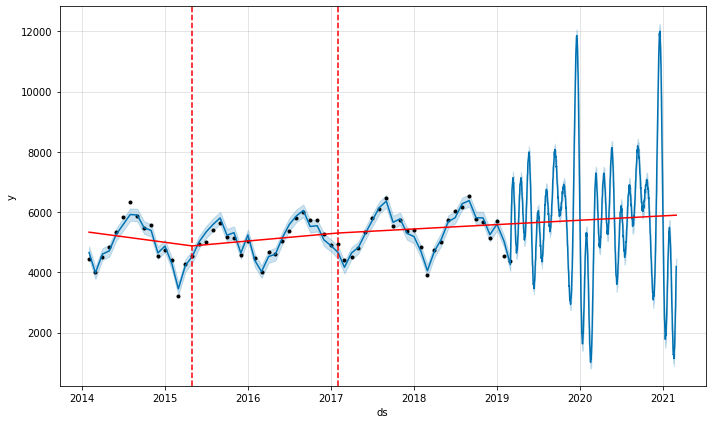

In [43]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
c = add_changepoints_to_plot(fig.gca(),m,forecast)


In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
metric_df = forecast.set_index('ds')[['yhat']].join(theft_prophet_data.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)
metric_df.head()


,ds,yhat,y
0,2014-01-31,4657.231101,4448.0
1,2014-02-28,3981.532823,4017.0
2,2014-03-31,4605.684869,4515.0
3,2014-04-30,4711.081194,4836.0
4,2014-05-31,5263.605939,5352.0


In [45]:
r2_score(metric_df.y, metric_df.yhat)

0.8762111564678831

In [46]:
mean_squared_error(metric_df.y, metric_df.yhat)


54211.978298797614

In [47]:
mean_absolute_error(metric_df.y, metric_df.yhat)

173.78030271815203

In [48]:
from fbprophet.diagnostics import cross_validation
forecast = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
forecast.head()


INFO:fbprophet:Making 5 forecasts with cutoffs between 2016-03-10 00:00:00 and 2018-02-28 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 24.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-03-31,-184.391478,-200.847976,-159.264777,4661,2016-03-10
1,2016-04-30,8727.120455,8660.910288,8812.486514,4594,2016-03-10
2,2016-05-31,4057.556727,3913.090870,4232.667055,5046,2016-03-10
3,2016-06-30,1559.866899,1319.591416,1820.623010,5359,2016-03-10
4,2016-07-31,4834.724830,4480.749887,5200.131840,5820,2016-03-10


In [49]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(forecast)
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,coverage
0,51 days,7.007761e+06,2647.217590,1851.732896,0.390926,0.144256,0.0
1,55 days,3.120698e+06,1766.549803,1109.877871,0.229147,0.091668,0.0
2,56 days,2.980418e+06,1726.388586,1012.918168,0.214685,0.080850,0.0
3,60 days,2.975610e+06,1724.995624,1007.990327,0.209822,0.077079,0.0
4,61 days,2.954180e+06,1718.772952,969.950544,0.203471,0.075700,0.0
